In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [2]:
df = pd.read_csv("adult.csv")

# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
def val_count(data):
    for i in data.columns:
        print(i)
        print(data[i].value_counts(dropna=False))
        print(25 * "*-", "\n")

In [7]:
val_count(df)

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*- 

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*- 

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
82649      1
193304     1
227689     1
135891     1
250034     1
Name: fnlwgt, Length: 28523, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*- 

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-s

In [8]:
# df['workclass'].replace('?','Unknown',inplace=True)
unknown_wrkcls = df["workclass"] == "?"

unknown_wrkcls

0        False
1        False
2        False
3        False
4         True
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: workclass, Length: 48842, dtype: bool

In [9]:
df[unknown_wrkcls]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [10]:
# df[unknown_wrkcls]["workclass"] = "Unknown"
df.loc[unknown_wrkcls, "workclass"] = "Unknown"

df.iloc[[22]]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
22,72,Unknown,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K


In [11]:
unknown_occupation = df["occupation"] == "?"

df[unknown_occupation]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,Unknown,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,Unknown,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,Unknown,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,Unknown,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,Unknown,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,Unknown,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,Unknown,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,Unknown,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,Unknown,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [12]:
df.loc[unknown_occupation, "occupation"] = "Unknown"
df.iloc[[13]]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
13,58,Unknown,299831,HS-grad,9,Married-civ-spouse,Unknown,Husband,White,Male,0,0,35,United-States,<=50K


In [13]:
unknownn_country = df["native-country"] == "?"
df[unknownn_country]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
188,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?,<=50K
253,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48773,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
48791,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [14]:
df.loc[unknownn_country, "native-country"] = "Unknown"

df.iloc[[19]]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,Unknown,>50K


In [15]:
# def replacer(df,value,subtitude):
#     for i in df.columns:
#         if df[i].isin([value]).any():
#             print(i, "Column has changed")
#             unknow = df[i] == value
#             df.loc[unknow, i] = subtitude
# replacer(df, "?", "Unknown")    

In [16]:
for i in df.columns:
    df[i].replace("?", "Unknown")  # tüm sütunlarda gezer. ? varsa Unknown olarak değiştirir

In [17]:
df.education

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: object

In [18]:
df["educational-num"]

0         7
1         9
2        12
3        10
4        10
         ..
48837    12
48838     9
48839     9
48840     9
48841     9
Name: educational-num, Length: 48842, dtype: int64

In [19]:
df.groupby("education")["educational-num"].value_counts()
# df.groupby("education")["education-num"].count().sort_values()

education     educational-num
10th          6                   1389
11th          7                   1812
12th          8                    657
1st-4th       2                    247
5th-6th       3                    509
7th-8th       4                    955
9th           5                    756
Assoc-acdm    12                  1601
Assoc-voc     11                  2061
Bachelors     13                  8025
Doctorate     16                   594
HS-grad       9                  15784
Masters       14                  2657
Preschool     1                     83
Prof-school   15                   834
Some-college  10                 10878
Name: educational-num, dtype: int64

In [20]:
df["educational-num"].value_counts() #.sort_values()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [21]:
df.drop("educational-num", axis=1, inplace=True)  # education sütunuyla aynı şeyi ifade ettiği için bunu düşürdük.

In [22]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
marital-status    False
occupation        False
relationship      False
race              False
gender            False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [23]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [24]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.003706,-0.004366,-0.013519
capital-gain,0.077229,-0.003706,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.082157,0.054467,1.000000


In [25]:
df.describe(include="all")  # tüm değerleri gösterir. categoric ler dahil

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [26]:
df.describe()  # numeric değerleri gösterir

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [27]:
#age
IQR = (48-28)

In [28]:
48 + 1.5*IQR

78.0

In [29]:
df[df["age"] >= 78]["age"].value_counts()  # outlier için 78 yaş üstü sayısına bakıyoruz

90    55
80    38
81    37
78    34
79    30
82    15
84    13
83    11
88     6
85     5
87     3
89     2
86     1
Name: age, dtype: int64

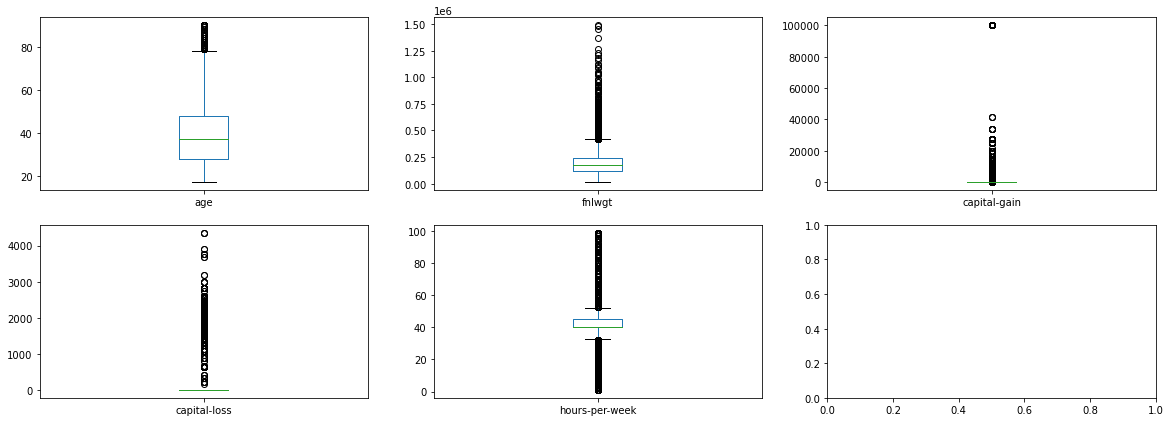

In [30]:
fig, axs = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes("number").columns:
    df[column].plot(kind = "box", ax = axs[x, y])
    if y < 2:
        y+=1
    else:
        x += 1
        y = 0

In [31]:
df[df["age"] >= 78].describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,250.000000,250.000000,250.000000,250.00000,250.000000
mean,82.888000,158100.256000,1918.060000,117.28800,27.500000
std,4.408309,88707.684175,9585.754419,558.55601,16.866175
min,78.000000,20101.000000,0.000000,0.00000,1.000000
25%,79.000000,97135.250000,0.000000,0.00000,15.000000
50%,81.000000,148846.000000,0.000000,0.00000,25.000000
75%,87.750000,197086.500000,0.000000,0.00000,40.000000
max,90.000000,562336.000000,99999.000000,4356.00000,99.000000


In [32]:
df[(df["age"] >= 78)].sample(20)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
34422,79,Self-emp-not-inc,84979,Assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,>50K
36763,80,Private,202483,HS-grad,Married-spouse-absent,Adm-clerical,Not-in-family,White,Female,0,0,16,United-States,<=50K
193,79,Unknown,48574,7th-8th,Widowed,Unknown,Not-in-family,White,Male,0,0,40,United-States,<=50K
48775,82,Unknown,403910,HS-grad,Never-married,Unknown,Not-in-family,White,Male,0,0,3,United-States,<=50K
17449,88,Self-emp-not-inc,206291,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
15408,89,Unknown,29106,10th,Married-civ-spouse,Unknown,Husband,White,Male,0,0,20,United-States,<=50K
27793,90,Private,87285,HS-grad,Never-married,Other-service,Own-child,White,Female,0,0,24,United-States,<=50K
42523,79,Self-emp-inc,183686,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,0,0,20,United-States,>50K
48806,81,Unknown,120478,Assoc-voc,Divorced,Unknown,Unmarried,White,Female,0,0,1,Unknown,<=50K
3668,81,Private,176500,12th,Widowed,Sales,Not-in-family,White,Female,0,0,30,United-States,<=50K


In [33]:
df[(df["hours-per-week"] == 99)].sample(20)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
13327,52,Self-emp-not-inc,284648,HS-grad,Divorced,Exec-managerial,Unmarried,White,Female,0,0,99,United-States,>50K
26112,67,Private,35015,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
46032,51,Self-emp-not-inc,32372,12th,Married-civ-spouse,Other-service,Husband,White,Male,0,0,99,United-States,<=50K
23179,53,Self-emp-not-inc,151159,10th,Married-spouse-absent,Transport-moving,Not-in-family,White,Male,0,0,99,United-States,<=50K
35334,27,Private,40295,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,0,0,99,United-States,<=50K
39507,51,Self-emp-not-inc,88528,Assoc-acdm,Divorced,Exec-managerial,Unmarried,White,Female,0,0,99,United-States,<=50K
30874,27,Private,179915,Bachelors,Never-married,Exec-managerial,Own-child,White,Female,0,0,99,United-States,<=50K
20367,50,Unknown,174964,10th,Married-civ-spouse,Unknown,Husband,White,Male,0,0,99,United-States,<=50K
384,29,Private,211208,11th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,>50K
36012,34,Federal-gov,345259,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K


In [34]:
df[(df["hours-per-week"] == 99)][["age"]].agg(["median", "mean", "count"])

,age
median,42.000000
mean,44.007299
count,137.000000


In [35]:
df[(df["age"] >= 78) & (df["hours-per-week"] == 99)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
8427,90,Federal-gov,311184,Masters,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
31637,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K


In [36]:
99/7  # günde 14.14 saat çalışıyor

14.142857142857142

In [37]:
df.groupby(by = ["age", "workclass"])["hours-per-week"].agg(["mean", "median", "min", "max", "count"]).loc[90]

,mean,median,min,max,count
workclass,,,,,
Federal-gov,64.500000,64.5,30,99,2
Local-gov,40.000000,40.0,20,60,5
Private,39.114286,40.0,10,99,35
Self-emp-not-inc,41.400000,45.0,12,60,5
Unknown,20.750000,12.5,4,40,8


In [38]:
df.drop(index=[8427, 31637], inplace=True)

---
# How many of each race are represented in this dataset?
---

In [39]:
race_count = df.race.value_counts()  # ırkların sayısına bakıyoruz
race_count

White                 41760
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

<AxesSubplot:>

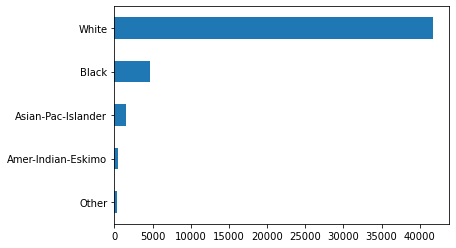

In [40]:
race_count.sort_values().plot.barh()  # beyazlar yoğunlukta

---
# What is the average age of men/women?
---

In [41]:
average_age_men = df.loc[df["gender"] == "Male", "age"].mean()  # erkeklerin yaş ortalaması
average_age_men

39.49130115167851

In [42]:
round(average_age_men, 1)

39.5

In [43]:
df.loc[df["gender"] == "Male", "age"].mode()

0    35
dtype: int64

In [44]:
df.loc[df["gender"] == "Male", "age"].std()

13.40743411917089

<AxesSubplot:>

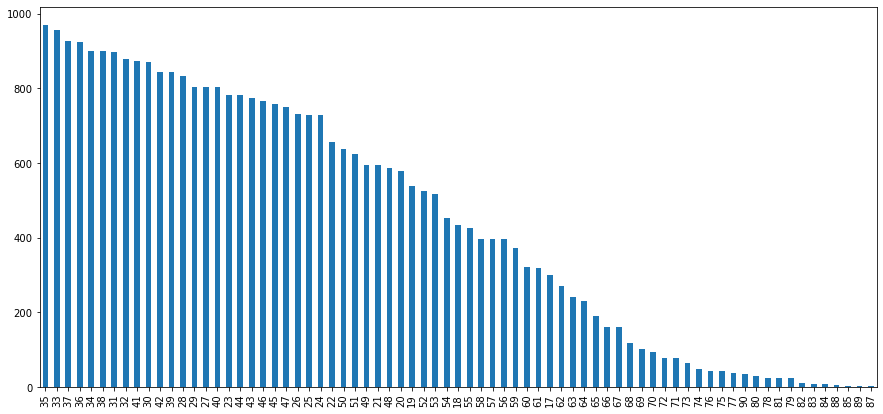

In [45]:
plt.figure(figsize = (15,7))
df.loc[df["gender"] == "Male", "age"].value_counts().plot.bar()

In [46]:
average_age_women = df.loc[df["gender"] == "Female", "age"].mean()  # kadınların yaş ortalaması
average_age_women

36.92798913043478

In [47]:
df.loc[df["gender"] == "Female", "age"].median()

35.0

In [48]:
df.loc[df["gender"] == "Female", "age"].mode()

0    23
dtype: int64

In [49]:
df.loc[df["gender"] == "Female", "age"].std()

14.13742261724767

<AxesSubplot:>

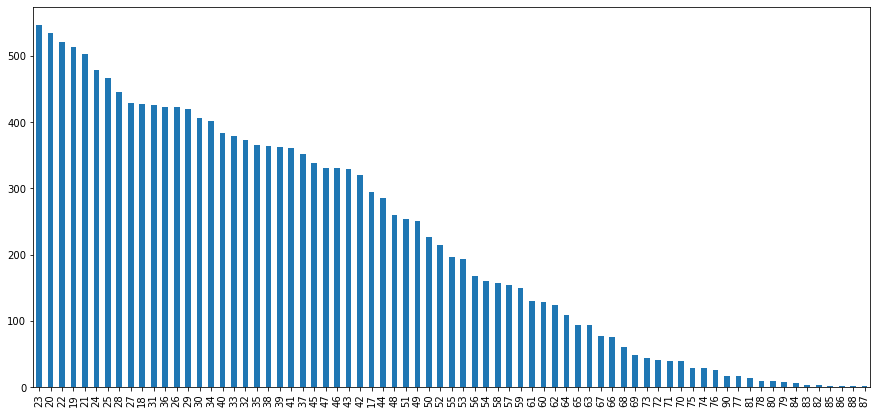

In [50]:
plt.figure(figsize = (15, 7))
df.loc[df["gender"] == "Female", "age"].value_counts().plot.bar()

---
# What is the percentage of people who have a Bachelor's degree?
---

In [51]:
df.groupby("education").education.count()

education
10th             1389
11th             1812
12th              657
1st-4th           247
5th-6th           509
7th-8th           955
9th               756
Assoc-acdm       1601
Assoc-voc        2061
Bachelors        8025
Doctorate         594
HS-grad         15783
Masters          2656
Preschool          83
Prof-school       834
Some-college    10878
Name: education, dtype: int64

In [52]:
df["education"].value_counts()

HS-grad         15783
Some-college    10878
Bachelors        8025
Masters          2656
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [53]:
upper = df.groupby("education").education.count().loc["Bachelors"]  # 8025 (lisans mezunu sayısı)

lower = df.groupby("education").education.count().sum()  # 48840 (tüm okuyanlar)

percentage_bachelors = upper / lower *100 # lisans mezununun tüm okuyanlara oranı (yüzdesi)

percentage_bachelors

16.43120393120393

In [54]:
upper

8025

In [55]:
lower

48840

In [56]:
df["education"].value_counts(normalize=True)  # normalize ile tüm eğitim seviyelerinin sıklığını değil % oranları döndürdük

HS-grad         0.323157
Some-college    0.222727
Bachelors       0.164312
Masters         0.054382
Assoc-voc       0.042199
11th            0.037101
Assoc-acdm      0.032781
10th            0.028440
7th-8th         0.019554
Prof-school     0.017076
9th             0.015479
12th            0.013452
Doctorate       0.012162
5th-6th         0.010422
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64

In [57]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors, 1)

16.4

In [58]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [59]:
df.head(3)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [60]:
df.income.value_counts()

<=50K    37153
>50K     11687
Name: income, dtype: int64

In [61]:
df.education.value_counts()

HS-grad         15783
Some-college    10878
Bachelors        8025
Masters          2656
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [62]:
higher_education = (df["education"] == "Bachelors") | (df["education"] == "Masters") | (df["education"] == "Doctorate")

higher_education

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: education, Length: 48840, dtype: bool

In [63]:
df_high_edu = df[higher_education]

df_high_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
11,36,Federal-gov,212465,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
15,43,Private,346189,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
19,40,Private,85019,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,Unknown,>50K
20,34,Private,107914,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
23,25,Private,220931,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48819,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
48820,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K
48825,31,Private,199655,Masters,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
48834,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [64]:
df_high_edu["income"] == ">50K"

11       False
15        True
19        True
20        True
23       False
         ...  
48819     True
48820     True
48825    False
48834    False
48835     True
Name: income, Length: 11275, dtype: bool

In [65]:
df_high_edu[df_high_edu["income"] == ">50K"]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
15,43,Private,346189,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
19,40,Private,85019,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,Unknown,>50K
20,34,Private,107914,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
36,36,Local-gov,403681,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
40,65,Private,136384,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48814,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
48817,34,Private,160216,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
48819,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
48820,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K


In [66]:
count = df_high_edu[df_high_edu["income"] == ">50K"].education.count()
shape = df_high_edu[df_high_edu["income"] == ">50K"].shape[0]

print(count, shape)

5203 5203


In [67]:
print(f"with shape attribute {shape}\nwith count method {count}")

with shape attribute 5203
with count method 5203


In [68]:
perc_high_edu = count / df["education"].size
perc_high_edu

0.10653153153153153

In [69]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 10.65


---
# What percentage of people without advanced education make more than 50K?
---

In [70]:
lower_education = ~higher_education

In [71]:
df_low_edu = df[lower_education]
df_low_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,103497,Some-college,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [72]:
df_low_edu[df_low_edu["income"] == ">50K"]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,279724,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48799,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
48800,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
48826,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [73]:
count = df_low_edu[df_low_edu["income"] == ">50K"].education.count()

In [74]:
count

6484

In [75]:
perc_low_edu = count / df["education"].size

In [76]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.28


In [77]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [78]:
df["hours-per-week"].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
79        1
94        1
87        1
82        1
69        1
Name: hours-per-week, Length: 96, dtype: int64

In [79]:
lazy_riches = (df["hours-per-week"] == df["hours-per-week"].min()) & (df["income"] == ">50K")
lazy_riches

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48840, dtype: bool

In [80]:
df[lazy_riches]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
11166,62,Private,312818,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,1,United-States,>50K
16470,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
36353,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K


In [81]:
num_lazy_riches = df[lazy_riches].shape[0]
num_lazy_riches

3

In [82]:
num_min_workers = df[(df["hours-per-week"] == df["hours-per-week"].min())].shape[0]
num_min_workers

27

In [83]:
3 / 27 * 100

11.11111111111111

In [84]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 11


 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [85]:
country_income_df = df.groupby("native-country")[["income"]].count()
country_income_df

,income
native-country,
Cambodia,28
Canada,182
China,122
Columbia,85
Cuba,138
Dominican-Republic,103
Ecuador,45
El-Salvador,155
England,127


In [86]:
country_income_df_riches = df[df["income"] == ">50K"].groupby(["native-country", ])[["income"]].count()
country_income_df_riches

,income
native-country,
Cambodia,9
Canada,63
China,36
Columbia,4
Cuba,34
Dominican-Republic,5
Ecuador,6
El-Salvador,11
England,47


In [87]:
rich_per_country = (country_income_df_riches / country_income_df).sort_values("income", ascending=True)
rich_per_country

,income
native-country,
Guatemala,0.034091
Outlying-US(Guam-USVI-etc),0.043478
Columbia,0.047059
Dominican-Republic,0.048544
Mexico,0.049422
Nicaragua,0.061224
El-Salvador,0.070968
Trinadad&Tobago,0.074074
Vietnam,0.081395


In [88]:
rich_per_country[rich_per_country["income"] == rich_per_country["income"].max()]

,income
native-country,
France,0.421053


In [89]:
rich_per_country.sort_values("income", ascending=False).iloc[[0]]

,income
native-country,
France,0.421053


<AxesSubplot:>

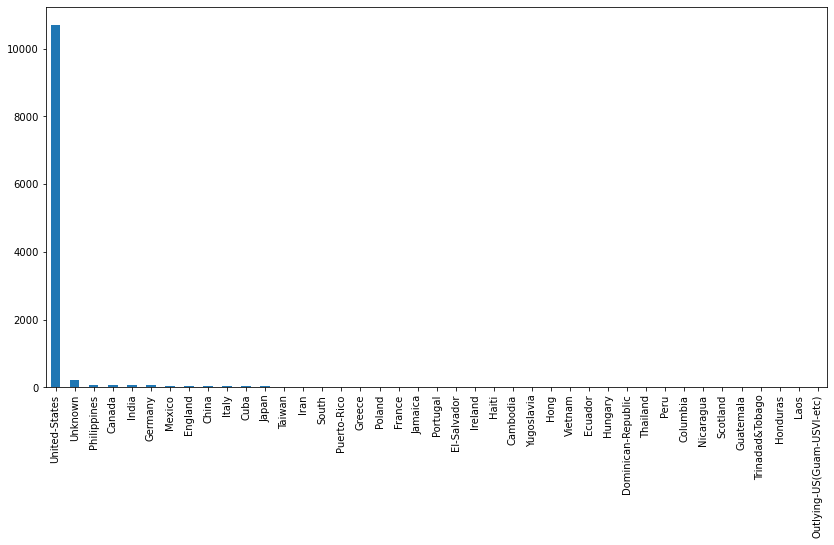

In [90]:
plt.figure(figsize = (14,7))
df.loc[df["income"] == ">50K", "native-country"].value_counts().plot(kind = "bar")

In [91]:

#df.loc[((df["income"] == ">50K") & (df["native-country"] == "France")), "native-country"].count()

In [92]:
#df.loc[((df["native-country"] == "France")), "native-country"].count()

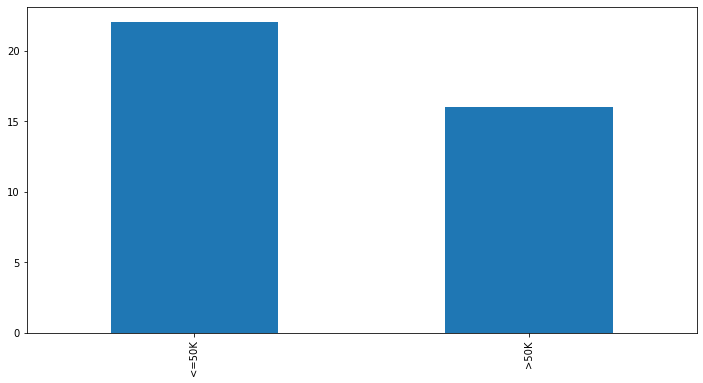

In [93]:
plt.figure(figsize = (12,6))
df.loc[((df["native-country"] == "France")), "income"].value_counts().plot.bar();

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [95]:
top_IN_occupation = (df["native-country"] == "India")&(df["income"] == ">50K")

top_IN_occupation

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48840, dtype: bool

In [96]:
df[top_IN_occupation]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1556,33,State-gov,150688,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K
1890,45,Federal-gov,110884,Bachelors,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,45,India,>50K
2359,53,Self-emp-not-inc,93449,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
2924,46,Self-emp-not-inc,135339,HS-grad,Married-spouse-absent,Craft-repair,Not-in-family,Asian-Pac-Islander,Male,0,0,45,India,>50K
3110,41,Federal-gov,350387,Masters,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46392,41,Federal-gov,219155,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,India,>50K
46433,48,Private,119471,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
47114,25,Private,110978,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,37,India,>50K
47608,38,State-gov,125499,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,7688,0,60,India,>50K


In [97]:
df[top_IN_occupation]["occupation"].value_counts()

Prof-specialty      35
Exec-managerial     12
Craft-repair         4
Adm-clerical         3
Tech-support         3
Other-service        2
Sales                2
Transport-moving     1
Name: occupation, dtype: int64

In [98]:
df[top_IN_occupation]["occupation"].value_counts().index[0]



'Prof-specialty'

In [99]:
a = df[top_IN_occupation]["occupation"].mode()[0]
a

'Prof-specialty'

In [100]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


----
---

* homework :
    1. If the age raises, does the salary increase also?
    2. What is the woking-hours distribution among US native?
    3. What is the most seen salary within married people?
    4. Avarage marriage rate in terms of nationality? 

* if you answer these questions you will be nominated to code-master badge. 